# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

# Print the number of rows extracted
print(f"Number of rows extracted: {len(rows)}")

Number of rows extracted: 1868


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

In [7]:
# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'id', 'sol', 'ls', 'month' to integers
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to floats
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"There are {num_sols} Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


In [14]:
# 3. What is the average minimum temperature by month?
print(f'The average minimum temperature per by month is:')
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print(avg_min_temp_by_month)

The average minimum temperature per by month is:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


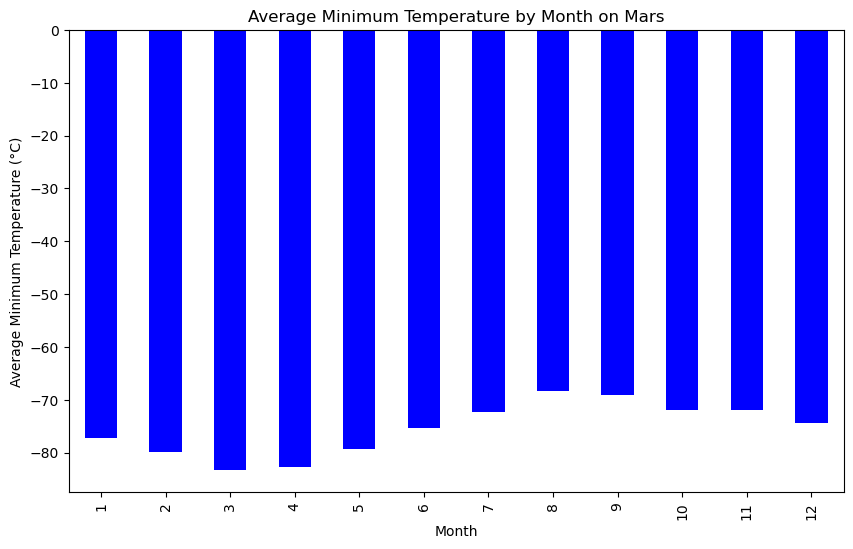

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6), color='blue', legend=False)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Assuming 'sorted_avg_min_temp_by_month' is already defined and sorted
coldest_month = sorted_avg_min_temp_by_month.idxmin()
warmest_month = sorted_avg_min_temp_by_month.idxmax()

print(f'The coldest month recorded at Curiosity\'s location was month #{coldest_month} with an average temperature of {sorted_avg_min_temp_by_month.min()}°C')
print(f'The warmest month recorded at Curiosity\'s location was month #{warmest_month} with an average temperature of {sorted_avg_min_temp_by_month.max()}°C')
print(f'These calculations are represented graphically below:')

# Display the sorted values
print(sorted_avg_min_temp_by_month)

The coldest month recorded at Curiosity's location was month #3 with an average temperature of -83.30729166666667°C
The warmest month recorded at Curiosity's location was month #8 with an average temperature of -68.38297872340425°C
These calculations are represented graphically below:
month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


In [17]:
# 4. What is the average pressure by month?
print(f'The average pressure per by month is:')
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(avg_pressure_by_month)

The average pressure per by month is:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


The lowest average atmospheric pressure recorded at Curiosity's location was 745.0544217687075 during month #6
The highest average atmospheric pressure recorded at Curiosity's location was 913.3059701492538 during month #9
These calculations are represented graphically below:


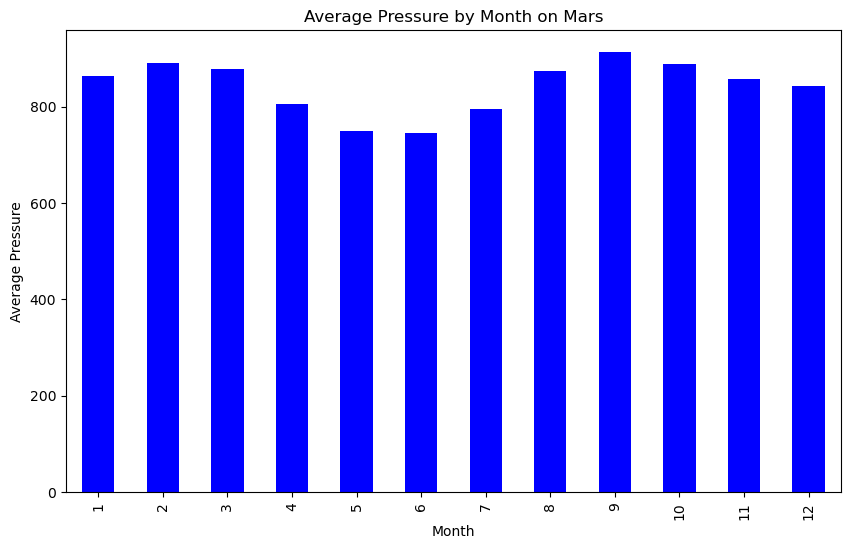

In [18]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10, 6), color='blue', legend=False)

# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

print(f'The lowest average atmospheric pressure recorded at Curiosity\'s location was {avg_pressure_by_month.min()} during month #{lowest_pressure_month}')
print(f'The highest average atmospheric pressure recorded at Curiosity\'s location was {avg_pressure_by_month.max()} during month #{highest_pressure_month}')
print(f'These calculations are represented graphically below:')

plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month on Mars')
plt.show()

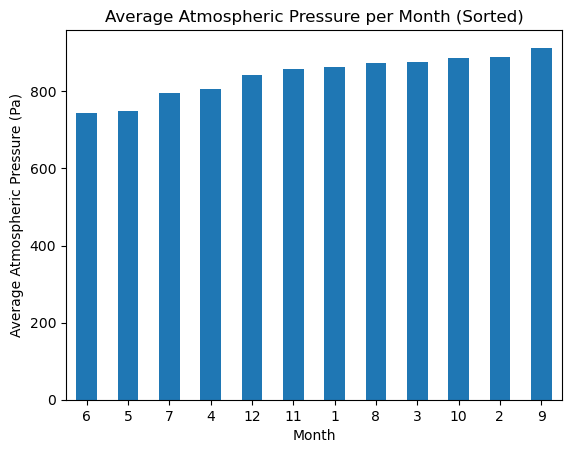

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
sorted_avg_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure per Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  # Optional: To make month labels more readable
plt.show()

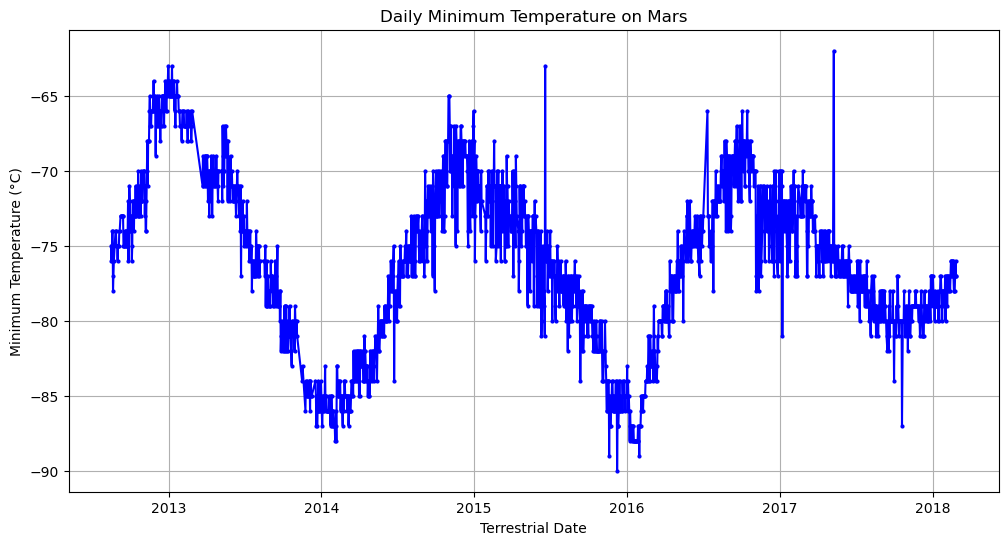

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='b', markersize=2)
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.show()

#### Minimum Temperature

The minimum temperature on Mars varies significantly due to its thin atmosphere and distance from the Sun. By examining the min_temp column, we can identify the coldest recorded temperatures and observe how they fluctuate over time or during specific Martian months.

Analysis:

The minimum temperatures can go as low as -77°C, which suggests extreme cold conditions on Mars.

These temperatures provide insights into the climate and possible habitability of Mars.

#### Atmospheric Pressure

The atmospheric pressure on Mars is much lower than that on Earth. The pressure column contains the atmospheric pressure measurements at Curiosity's location, which can help us understand the Martian atmosphere's behavior.

Analysis:

The atmospheric pressure values range around 727 Pa to 741 Pa.

These values indicate the thinness of Mars' atmosphere, which affects weather patterns and potential for sustaining life.

#### Year Length

By analyzing the data over an extended period, we can explore the Martian year's length and how it correlates with seasons, temperature variations, and other atmospheric factors.

Analysis:

Martian years can be identified by the sol and terrestrial_date columns.

By correlating these columns, we can determine the duration of a Martian year and how it affects seasonal changes on Mars.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [22]:
browser.quit()